In [28]:
import pandas as pd

In [9]:
import easyocr
#download the model
reader = easyocr.Reader(['en'], gpu = False)

Using CPU. Note: This module is much faster with a GPU.


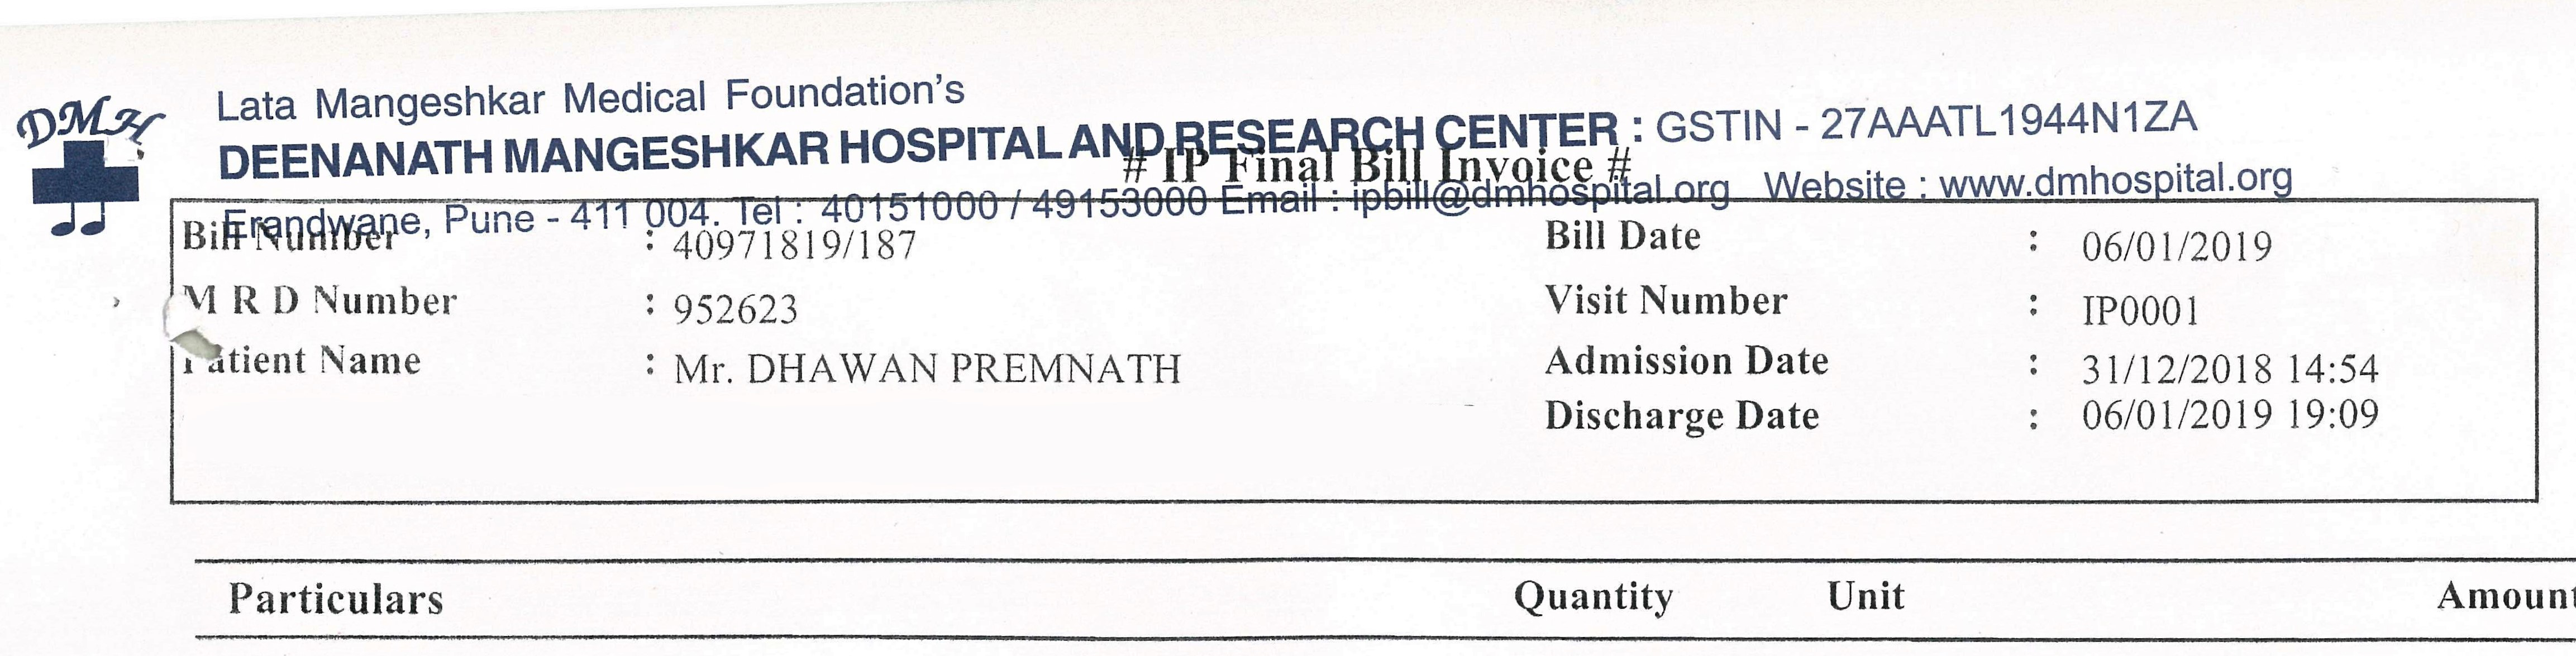

In [20]:
# show an image
import PIL
from PIL import ImageDraw
im = PIL.Image.open("filtered1.jpg")
im

In [19]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext('filtered1.jpg')
bounds

[([[17, 161], [306, 161], [306, 277], [17, 277]], 'DMg', 0.4298802468535104),
 ([[375, 112], [1744, 112], [1744, 239], [375, 239]],
  "Lata Mangeshkar Medical Foundation's",
  0.8614364052459202),
 ([[2556, 185], [2913, 185], [2913, 287], [2556, 287]],
  'CENTER',
  0.9932038577180902),
 ([[2920, 210], [2945, 210], [2945, 257], [2920, 257]],
  '3',
  0.1565128879262625),
 ([[2954, 183], [3202, 183], [3202, 270], [2954, 270]],
  'GSTIN',
  0.9999387278393849),
 ([[3248, 162], [3943, 162], [3943, 266], [3248, 266]],
  '27AAATL19AANIZA',
  0.7059818016077447),
 ([[381, 215], [1500, 215], [1500, 339], [381, 339]],
  'DEENANATH MANGESHKAR',
  0.9985497329977292),
 ([[1479, 184], [2571, 184], [2571, 367], [1479, 367]],
  'HOSPITAL ANP RESEARGH',
  0.3990004119605654),
 ([[2160, 243], [3124, 243], [3124, 415], [2160, 415]],
  '~xan-gilelyaicsolalorg',
  0.035629510573244975),
 ([[3144, 273], [4116, 273], [4116, 375], [3144, 375]],
  'Website ; WWW dmhospital org_',
  0.377521949705259),
 ([[3

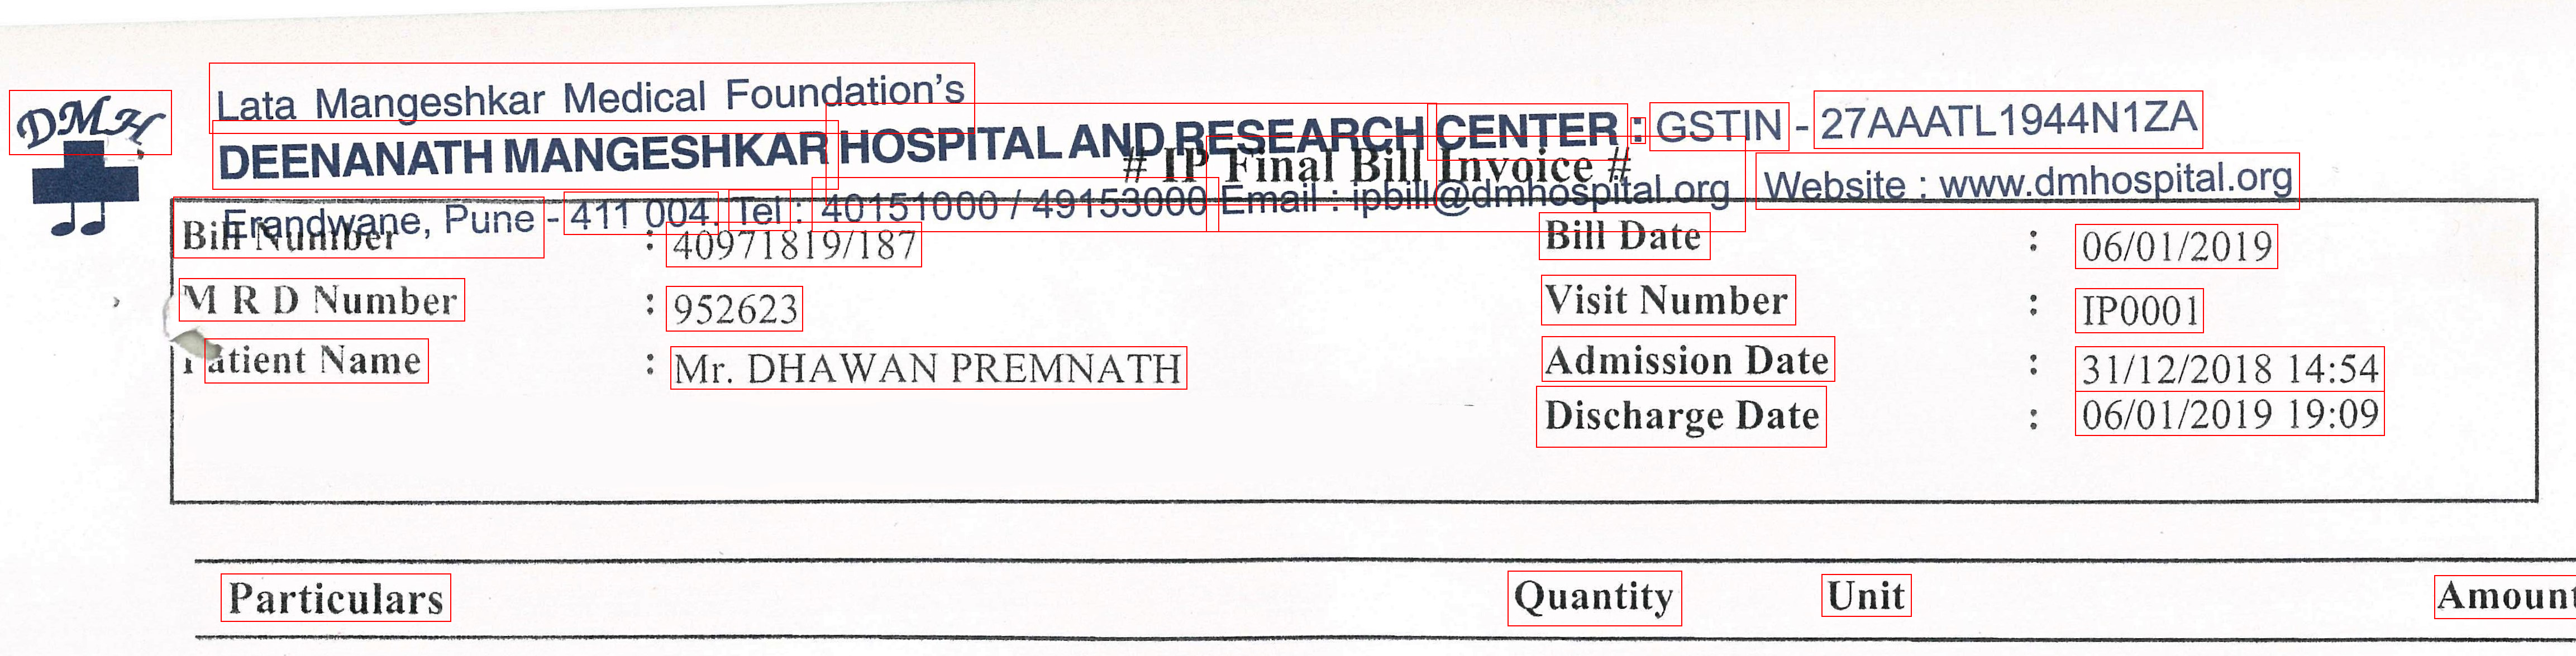

In [21]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='red', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

In [22]:
len(bounds)

31

In [36]:
output=pd.Series({"Hospital name":str(bounds[6][1])+" "+str(bounds[7][1])+" "+str(bounds[2][1]),
                     "Patient name":bounds[22][1],
                     "Bill number":bounds[15][1],
                     "Bill date":bounds[16][1],
                     "Admission Date":bounds[24][1],
                     "Discharge Date":bounds[26][1]})
output

Hospital name     DEENANATH MANGESHKAR HOSPITAL ANP RESEARGH CENTER
Patient name                                    Mr. DHAWAN PREMNATH
Bill number                                            40971819/187
Bill date                                                06/01/2019
Admission Date                                     31/12/2018 14.54
Discharge Date                                     06/01/2019 19.09
dtype: object

In [37]:
output.to_csv("bill.csv",header=False)